In [20]:
# do the fits
import numpy as np
import matplotlib as mtlp
import matplotlib.pyplot as plt
import matplotlib.ticker as tck
from matplotlib import rc
from pyik.mplext import plot_hist, uncertainty_ellipse
from scipy.stats import chi2
import yaml
import arviz as az
import pickle 
import pandas as pd 
from math import pi
import mplhep as hep
rc('text', usetex=True)

In [6]:
LambdaNP=1e+3  #GeV
v= 246.
mh=125.1

def CHtokl(CH):
    return 1-2.0*CH*v**4/mh**2/LambdaNP**2

def kltoCH(kl):
    return LambdaNP**2/v**4*mh**2*0.5*(1-kl)



filename = './results/plots/testplot.pdf'

files =['./results/fits/Cq1_AllHiggsObs.pickle',
        './results/fits/Cq1_AllHiggsObs_linearl3.pickle',
        './results/fits/Cq1_AllHiggsObs_linearmu.pickle',
        './results/fits/Cq1_AllHiggsObs_linearl3_linearmu.pickle',
        './results/fits/Cq8_AllHiggsObs.pickle',
        './results/fits/Cq8_AllHiggsObs_linearl3.pickle',
        './results/fits/Cq8_AllHiggsObs_linearmu.pickle',
        './results/fits/Cq8_AllHiggsObs_linearl3_linearmu.pickle'
        ,
        './results/fits/Cqtqb1_AllHiggsObs.pickle',
        './results/fits/Cqtqb1_AllHiggsObs_linearl3.pickle',
        './results/fits/Cqtqb1_AllHiggsObs_linearmu.pickle',
        './results/fits/Cqtqb1_AllHiggsObs_linearl3_linearmu.pickle'
                ,
        './results/fits/Cqtqb8_AllHiggsObs.pickle',
        './results/fits/Cqtqb8_AllHiggsObs_linearl3.pickle',
        './results/fits/Cqtqb8_AllHiggsObs_linearmu.pickle',
        './results/fits/Cqtqb8_AllHiggsObs_linearl3_linearmu.pickle'
       ]
labels=[r"$C_{Qt}^{(1)}$","$C_{Qt}^{(8)}$","$C_{QtQb}^{(1)}$","$C_{QtQb}^{(8)}$"]

In [33]:
# # Libraries
kltoCH(-0.24),-kltoCH(-0.24)-kltoCH(17.0)+kltoCH(-9.4)
var=[
r'$C_{Qt}^{(1)}$',
r'$C_{Qt}^{(8)}$',
r'$C_{QtQb}^{(1)}$',
r'$C_{QtQb}^{(8)}$',
r'$C_{tt}^{(1)}$',
r'$C_{QQ}^{(1)}$',
r'$C_{QQ}^{(8)}$',
]
# Set data
def multimode(x, n, hdi_prob):
    """ Finds all the modes in the distribution
        arguments:
            x: the array for the distribution
            n: the identifier for the variable
    """
    md = az.hdi(x, hdi_prob=hdi_prob, multimodal=False)
    if len(md) < 2 and n > 1:
        return np.NaN
    else:
        return md[n%2]    
def MakeSpiderPlot(operator, modelfiles,types):
    stats_func_2 = {
        'b0': lambda x: multimode(x, 0, 0.9545),
        'b1': lambda x: multimode(x, 1, 0.9545),
        }
    ymu=np.zeros(1)
    yup=np.zeros(1)
    ydown=np.zeros(1)
    chmu=np.zeros(1)
    chup=np.zeros(1)
    chdown=np.zeros(1)
    for modelfile in modelfiles:
        with open(modelfile, 'rb') as buff:
            data = pickle.load(buff)
            model = data['model']
            trace = data['trace']
            df_2 = pd.DataFrame(az.summary(trace, kind='stats', hdi_prob=0.9545, round_to='none', stat_funcs=stats_func_2))
            yup=np.append(yup,[df_2.loc['C4Q']['hdi_97.725%']])
            ydown=np.append(ydown,[df_2.loc['C4Q']['hdi_2.275%']])
            ##
            chup=np.append(chup,[df_2.loc['Cphi']['hdi_97.725%']])
            chdown=np.append(chdown,[df_2.loc['Cphi']['hdi_2.275%']])
    yup= yup[yup!=0]
    ymu= ymu[ymu!=0]
    ydown= ydown[ydown!=0]
    chup= chup[chup!=0]
    chmu= chmu[chmu!=0]
    chdown= chdown[chdown!=0]
    df = pd.DataFrame({
        'group': [r'$C_\phi$',operator],
        types[0]:  np.log10([(np.abs(chdown[0]+0.5*(-chdown[0]+chup[0]))),(np.abs(ydown[0]+0.5*(-ydown[0]+yup[0])))]),
        types[1]:  np.log10([(np.abs(chdown[1]+0.5*(-chdown[1]+chup[1]))),(np.abs(ydown[1]+0.5*(-ydown[1]+yup[1])))]),
        types[2]:  np.log10( [(np.abs(chdown[2]+0.5*(-chdown[2]+chup[2]))),(np.abs(ydown[2]+0.5*(-ydown[2]+yup[2])))]),
        types[3]:  np.log10([(np.abs(chdown[3]+0.5*(-chdown[3]+chup[3]))),(np.abs(ydown[3]+0.5*(-ydown[3]+yup[3])))] ),
        r"Single param. fit": np.log10([np.abs(kltoCH(17.0)+0.5*(-kltoCH(17.0)+kltoCH(-9.4))),np.nan]),
        r"$hh\,\, 36 \mathrm{fb}^{-1}$": np.log10([np.abs(kltoCH(12.0)+0.5*(-kltoCH(12.0)+kltoCH(-5.0))),np.nan])
    })
    
    print(df)
    # ------- PART 1: Create background

    categories=list(df)[1:]
    N = len(categories)
 
    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]
 
    # Initialise the spider plotcolpastil = ['#f4ecec','#937eba','#72bbd0','#f09494','#91f0a1']
    plt.style.use(hep.style.LHCb2)
    colpastil = ['#f4ecec','#937eba','#72bbd0','#f09494','#91f0a1']
    plt.style.use(hep.style.LHCb2)
    ax = plt.subplot(111, polar=True)
 
    # If you want the first axis to be on top:
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)
 
    # Draw one axe per variable + add labels
    plt.xticks(angles[:-1], categories)
    ax.tick_params(axis='x', which='major', pad=35)
 
    # Draw ylabels
    ax.set_rlabel_position(2)
    plt.yticks([-1,0,1,2], [r"$10^{-1}$",r"$10^{0}$",r"$10^{1}$",r"$10^{2}$"], color="grey", size=18)
#plt.ylim(0,40)
 

# ------- PART 2: Add plots
 
# Plot each individual = each line of the data
# I don't make a loop, because plotting more than 3 groups makes the chart unreadable
 
# Ind1
    values=df.loc[0].drop('group').values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values,color=colpastil[1], linewidth=1, linestyle='solid')
    ax.fill(angles, values, colpastil[1], alpha=0.1, label=r'$C_\phi$')
 
    # Ind2
    values=df.loc[1].drop('group').values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, color=colpastil[3],linewidth=1, linestyle='solid')
    ax.fill(angles, values, colpastil[3], alpha=0.18,label=operator)
 
    # Add legend
    plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

    # Show the graph
    plt.show()
    


Got error No model on context stack. trying to find log_likelihood in translation.
Got error No model on context stack. trying to find log_likelihood in translation.
Got error No model on context stack. trying to find log_likelihood in translation.
Got error No model on context stack. trying to find log_likelihood in translation.


            group  Higgs $\mu^{R}\,\lambda_3^{R}$  \
0        $C_\phi$                        0.803612   
1  $C_{Qt}^{(1)}$                       -0.870359   

   Higgs $\mu^{R}\,\lambda_3^{L}$  Higgs $\mu^{L}\,\lambda_3^{R}$  \
0                        1.591643                        0.822584   
1                       -1.345188                       -0.291202   

   Higgs $\mu^{L}\,\lambda_3^{L}$  Single param. fit  \
0                        1.624108           0.776902   
1                       -0.217903                NaN   

   $hh\,\, 36 \mathrm{fb}^{-1}$  
0                      0.727684  
1                           NaN  


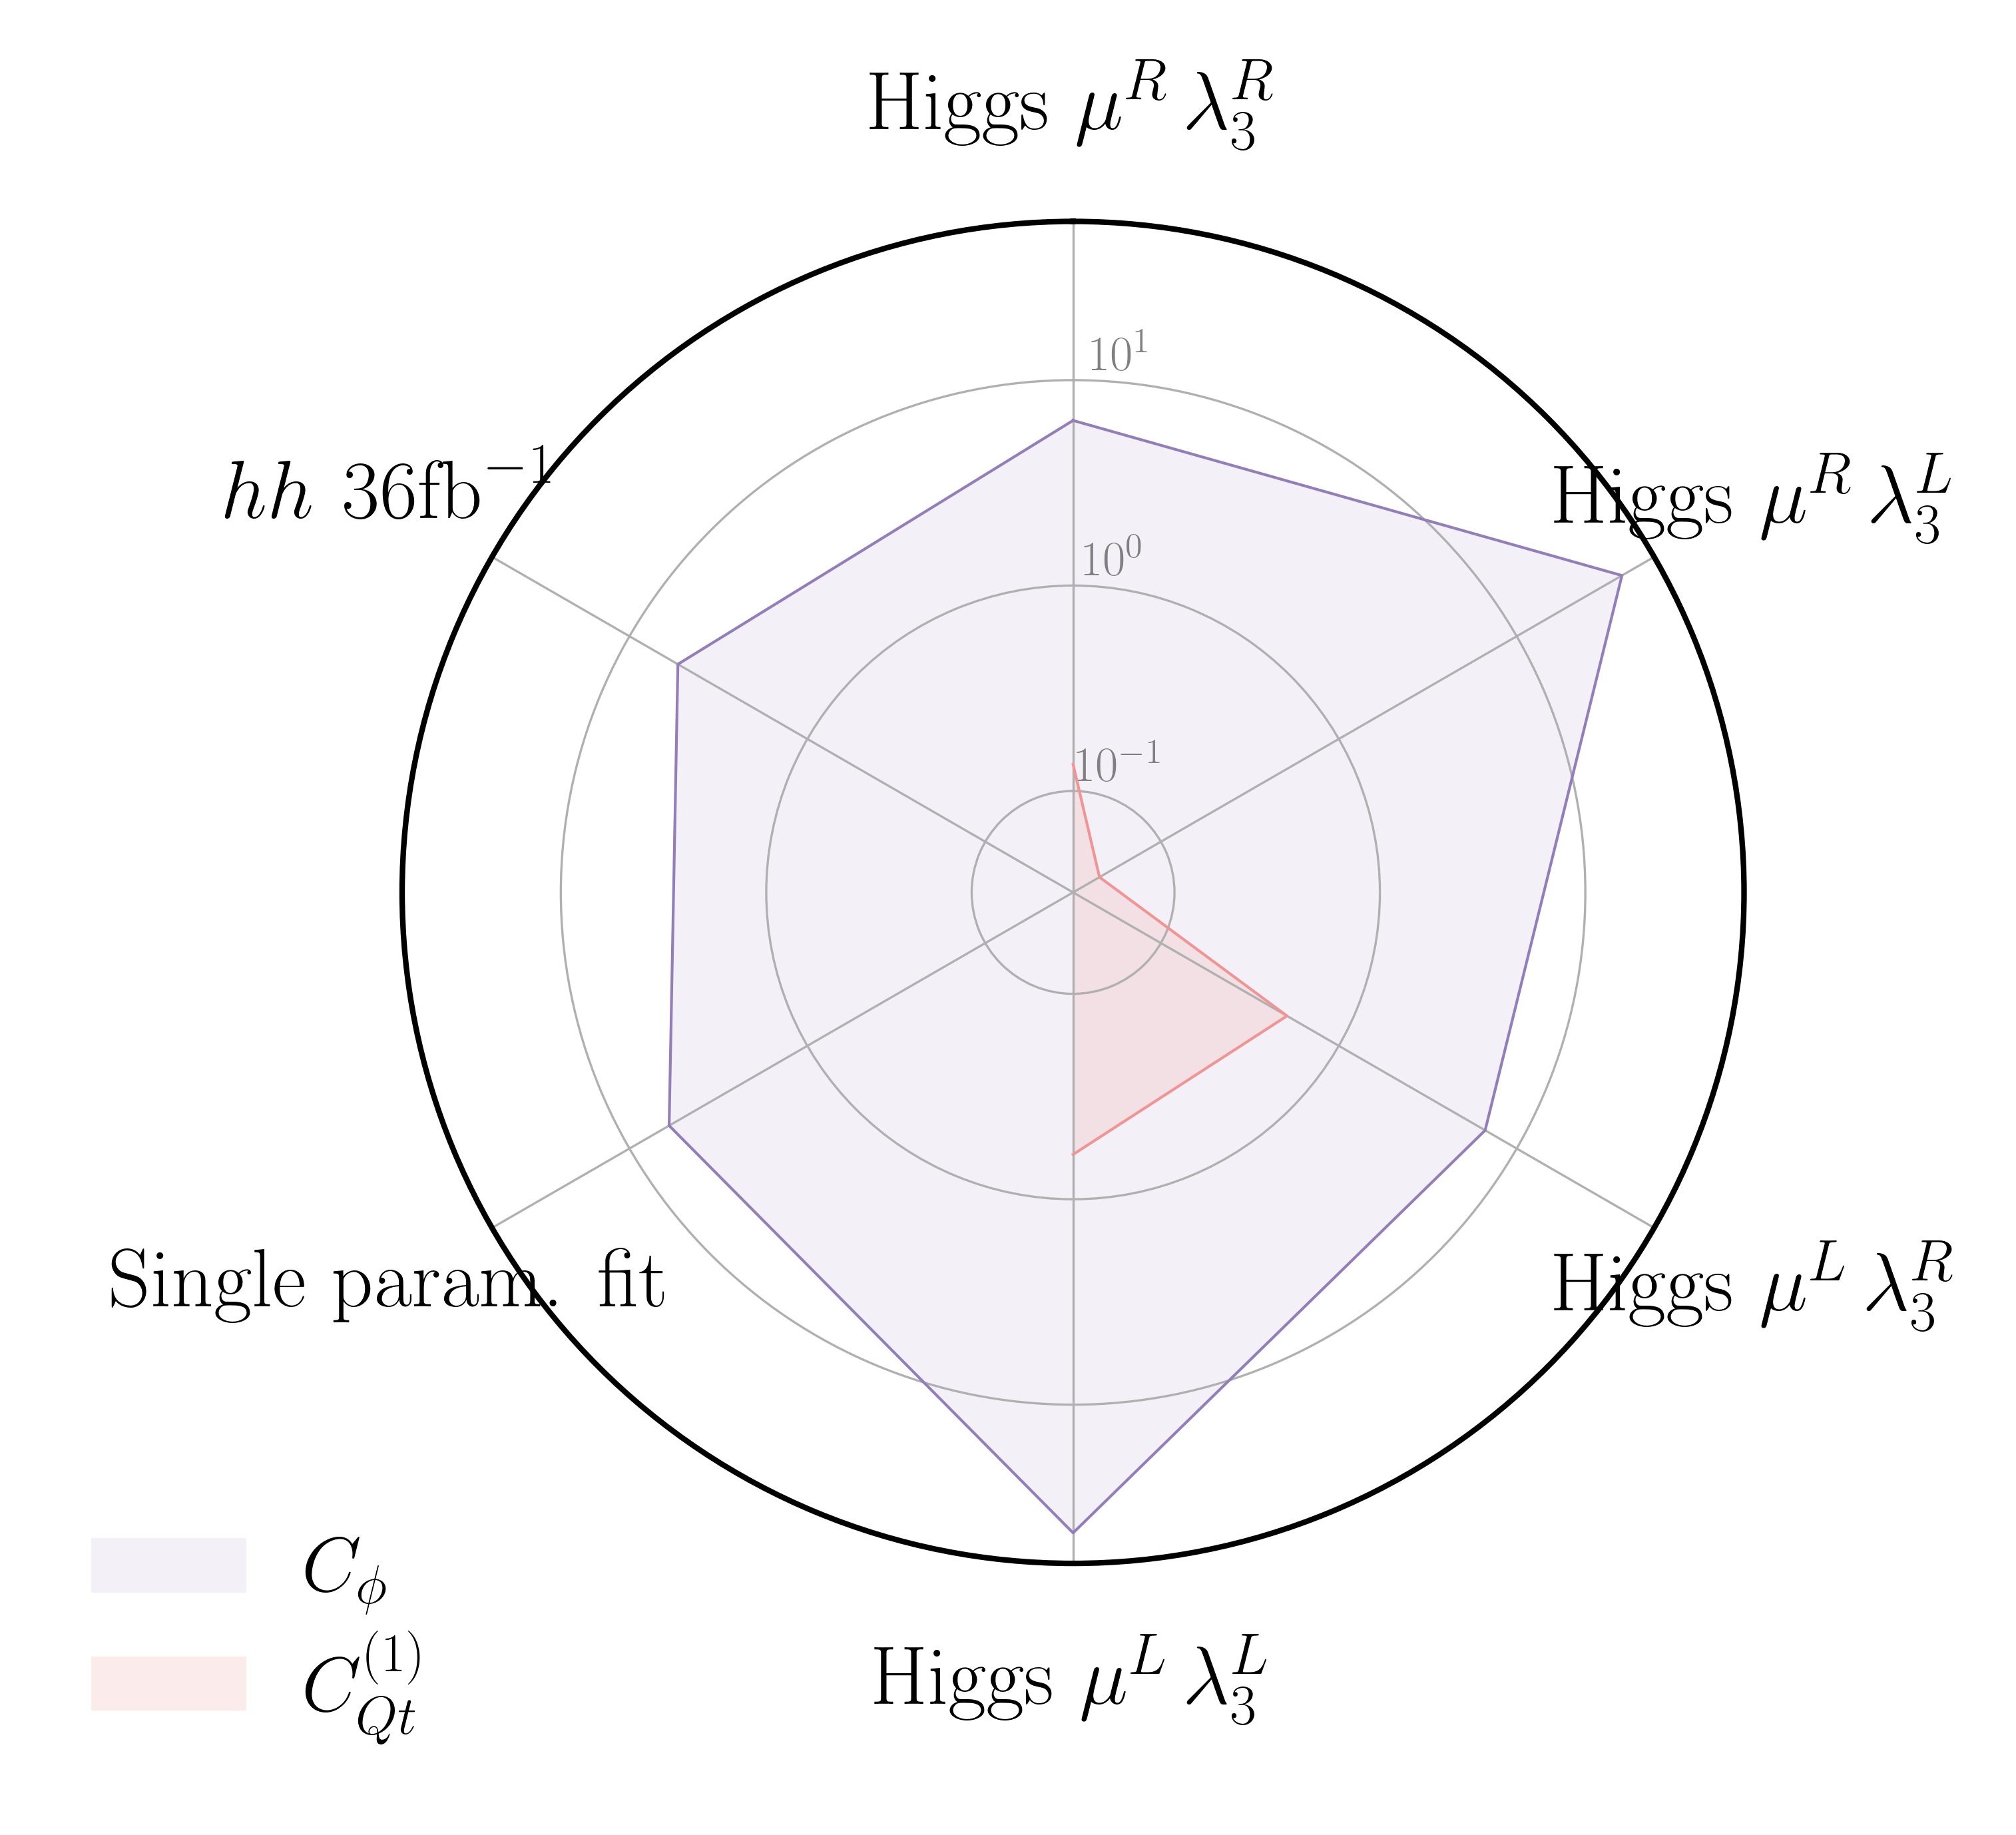

In [34]:
files =['./results/fits/Cq1_AllHiggsObs.pickle',
        './results/fits/Cq1_AllHiggsObs_linearl3.pickle',
        './results/fits/Cq1_AllHiggsObs_linearmu.pickle',
        './results/fits/Cq1_AllHiggsObs_linearl3_linearmu.pickle'
       ]
labels=[r"$C_{Qt}^{(1)}$","$C_{Qt}^{(8)}$","$C_{QtQb}^{(1)}$","$C_{QtQb}^{(8)}$"]
types= [r"Higgs $\mu^{R}\,\lambda_3^{R}$", 
          r"Higgs $\mu^{R}\,\lambda_3^{L}$",
         r"Higgs $\mu^{L}\,\lambda_3^{R}$",
        r"Higgs $\mu^{L}\,\lambda_3^{L}$"]
MakeSpiderPlot(r"$C_{Qt}^{(1)}$", modelfiles=files,types=types)